In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
df = pd.read_csv('../../data/raw/btcdata_raw.csv')

/tmp/ipython-input-3517301323.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('btcdata_raw.csv')


In [5]:
df

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,market_cap,total_volume
0,2025-10-09 10:07:00+00:00,121895.99,121858.06,121870.68,6.354,774406.77,121895.57,direct,NaN,2.428033e+12,5.642424e+10
1,2025-10-09 10:07:01+00:00,121895.99,121858.06,121870.68,6.354,774406.77,121895.57,direct,NaN,2.428033e+12,5.642424e+10
2,2025-10-09 10:07:02+00:00,121895.99,121858.06,121870.68,6.354,774406.77,121895.57,direct,NaN,2.428033e+12,5.642424e+10
3,2025-10-09 10:07:03+00:00,121895.99,121858.06,121870.68,6.354,774406.77,121895.57,direct,NaN,2.428033e+12,5.642424e+10
4,2025-10-09 10:07:04+00:00,121895.99,121858.06,121870.68,6.354,774406.77,121895.57,direct,NaN,2.428033e+12,5.642424e+10
...,...,...,...,...,...,...,...,...,...,...,...
66394,2025-10-10 04:33:34+00:00,121375.99,121256.66,121375.66,6.979,846709.68,121256.67,direct,NaN,2.417306e+12,7.105677e+10
66395,2025-10-10 04:33:35+00:00,121375.99,121256.66,121375.66,6.979,846709.68,121256.67,direct,NaN,2.417306e+12,7.105677e+10
66396,2025-10-10 04:33:36+00:00,121375.99,121256.66,121375.66,6.979,846709.68,121256.67,direct,NaN,2.417306e+12,7.105677e+10
66397,2025-10-10 04:33:37+00:00,121375.99,121256.66,121375.66,6.979,846709.68,121256.67,direct,NaN,2.417306e+12,7.105677e+10


In [6]:
df.drop(['conversionType', 'conversionSymbol'], axis=1, inplace=True)
df.rename(columns={'volumeto': 'volume'}, inplace=True)

In [7]:
df['next_price'] = df['close'].shift(-1800)
df = df.dropna(subset=['next_price'])

In [8]:
df.head()

,time,high,low,open,volumefrom,volume,close,market_cap,total_volume,next_price
0,2025-10-09 10:07:00+00:00,121895.99,121858.06,121870.68,6.354,774406.77,121895.57,2.428033e+12,5.642424e+10,122162.01
1,2025-10-09 10:07:01+00:00,121895.99,121858.06,121870.68,6.354,774406.77,121895.57,2.428033e+12,5.642424e+10,122162.01
2,2025-10-09 10:07:02+00:00,121895.99,121858.06,121870.68,6.354,774406.77,121895.57,2.428033e+12,5.642424e+10,122162.01
3,2025-10-09 10:07:03+00:00,121895.99,121858.06,121870.68,6.354,774406.77,121895.57,2.428033e+12,5.642424e+10,122162.01
4,2025-10-09 10:07:04+00:00,121895.99,121858.06,121870.68,6.354,774406.77,121895.57,2.428033e+12,5.642424e+10,122162.01


In [9]:
df.columns

Index(['time', 'high', 'low', 'open', 'volumefrom', 'volume', 'close',
       'market_cap', 'total_volume', 'next_price'],
      dtype='object')

In [10]:
df['time'] = pd.to_datetime(df['time'])

/tmp/ipython-input-4237337754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = pd.to_datetime(df['time'])


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64598 entries, 0 to 64597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   time          64598 non-null  datetime64[ns, UTC]
 1   high          64598 non-null  float64            
 2   low           64598 non-null  float64            
 3   open          64598 non-null  float64            
 4   volumefrom    64598 non-null  float64            
 5   volume        64598 non-null  float64            
 6   close         64598 non-null  float64            
 7   market_cap    64598 non-null  float64            
 8   total_volume  64598 non-null  float64            
 9   next_price    64598 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(9)
memory usage: 7.4 MB


In [12]:
df.columns

Index(['time', 'high', 'low', 'open', 'volumefrom', 'volume', 'close',
       'market_cap', 'total_volume', 'next_price'],
      dtype='object')

In [13]:
df.isnull().sum()

,0
time,0
high,0
low,0
open,0
volumefrom,0
volume,0
close,0
market_cap,0
total_volume,0
next_price,0


In [14]:
df.describe()

,high,low,open,volumefrom,volume,close,market_cap,total_volume,next_price
count,64598.000000,64598.000000,64598.000000,64598.000000,6.459800e+04,64598.000000,6.459800e+04,6.459800e+04,64598.000000
mean,121664.117742,121598.709927,121633.108281,21.826479,2.652888e+06,121632.449384,2.423552e+12,6.661240e+10,121617.470997
std,773.150521,773.871831,774.063575,42.491677,5.162860e+06,774.170784,1.581306e+10,5.558818e+09,774.383152
min,119970.910000,119741.930000,119908.040000,0.715200,8.699712e+04,119908.040000,2.399591e+12,5.642424e+10,119908.040000
25%,121144.770000,121076.660000,121107.090000,6.510000,7.926331e+05,121107.090000,2.413881e+12,6.285145e+10,121107.090000
50%,121558.890000,121507.140000,121529.280000,13.080000,1.591205e+06,121528.290000,2.420050e+12,6.985022e+10,121490.600000
75%,121877.370000,121846.110000,121861.040000,25.810000,3.143048e+06,121859.480000,2.426794e+12,7.114815e+10,121835.650000
max,123818.950000,123719.390000,123762.530000,1162.430000,1.414311e+08,123762.530000,2.461600e+12,7.214350e+10,123762.530000


#Check Corelation

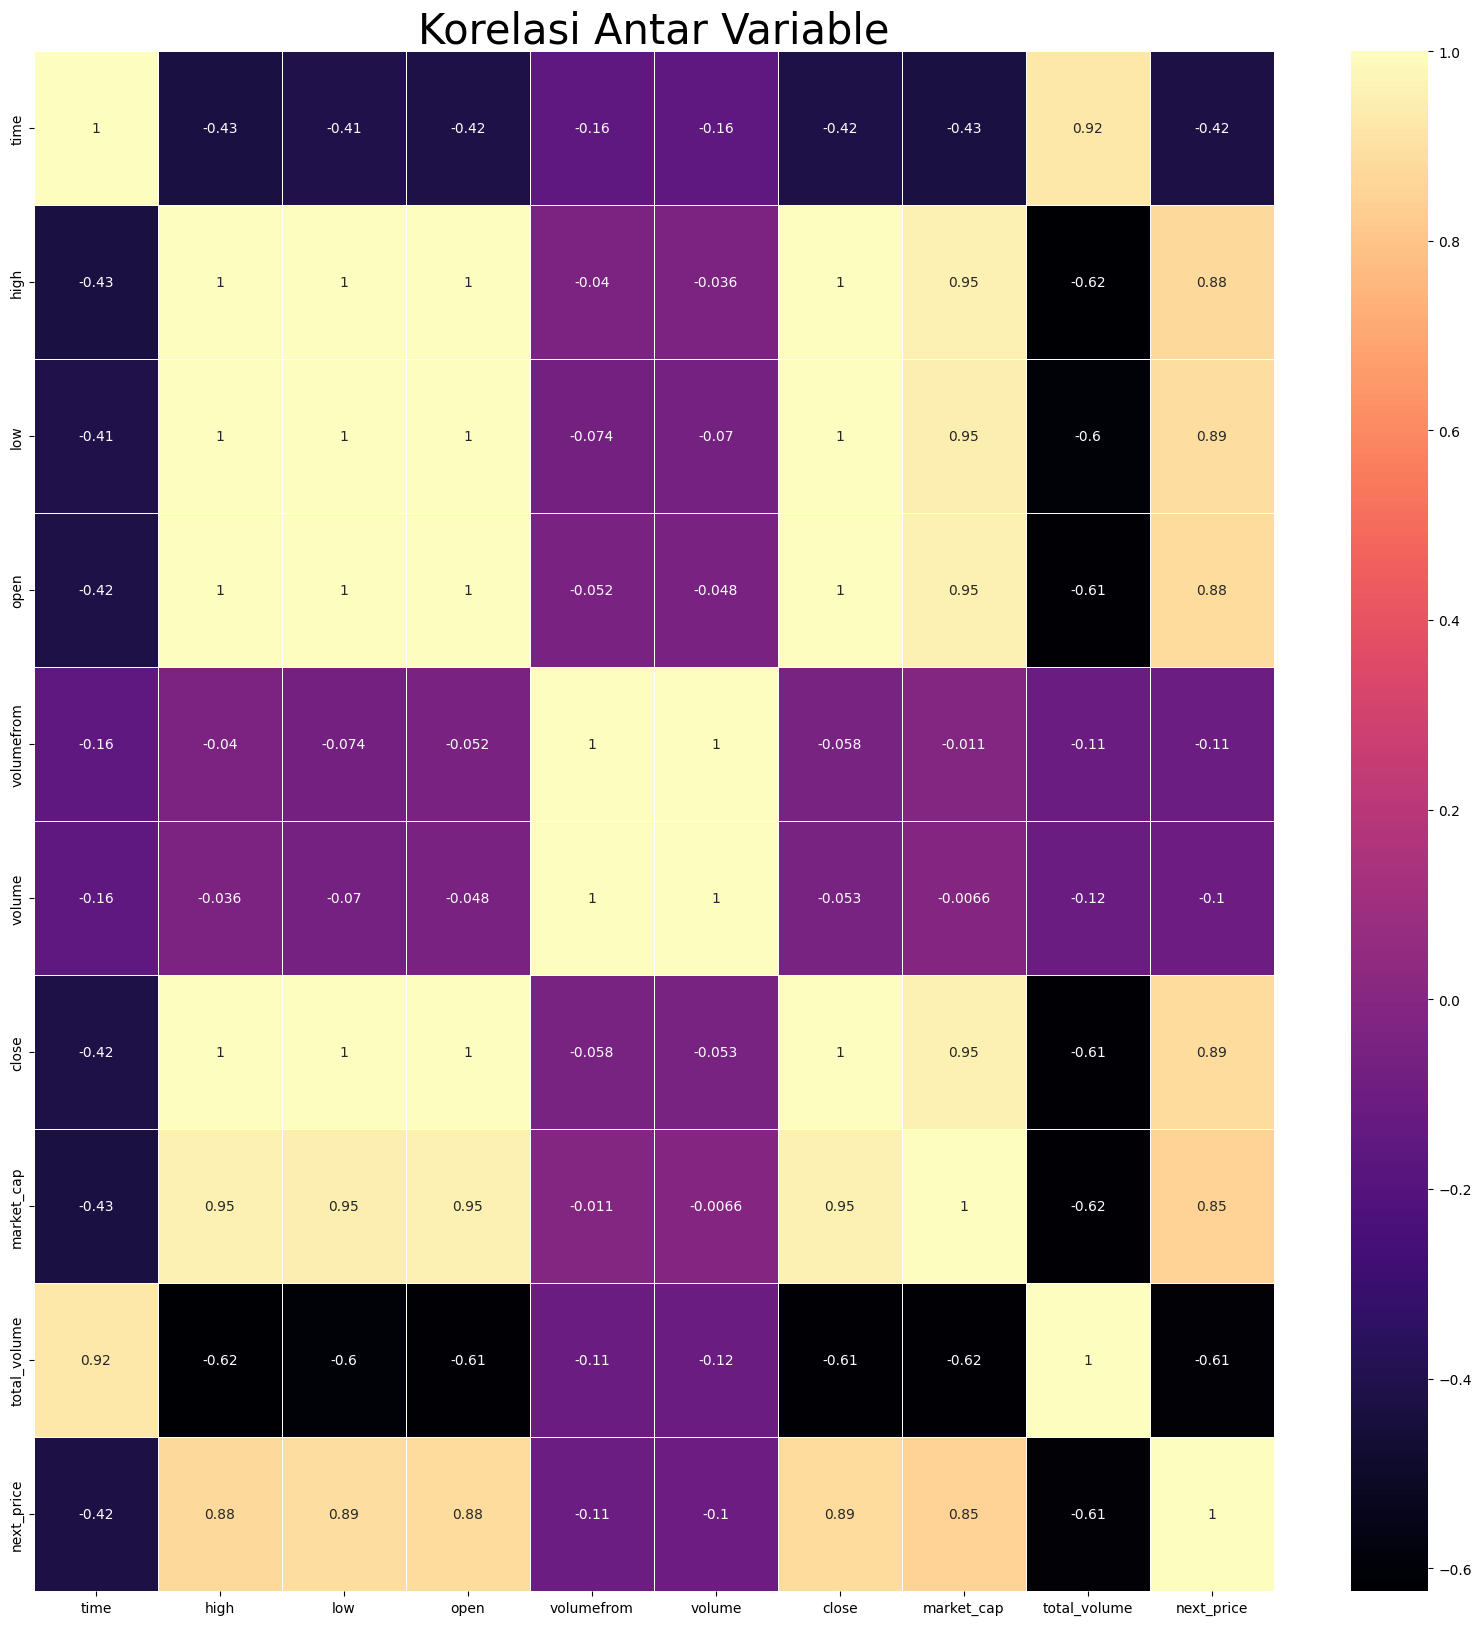

In [ ]:
# looking at the correlation between variables to find important features
plt.figure(figsize=(20,20))
cor = df.corr()
sns.heatmap(cor,annot=True, linewidth=.5, cmap="magma")
plt.title('Korelasi Antar Variable', fontsize = 30)
plt.show()

In [16]:
cor_matrix = df.corr()
cor_matrix['next_price'].sort_values()

,next_price
total_volume,-0.605776
time,-0.422057
volumefrom,-0.105991
volume,-0.102358
market_cap,0.848062
high,0.878687
open,0.880514
close,0.885269
low,0.887451
next_price,1.000000


In [17]:
select_columns = ['open', 'high', 'low', 'close', 'market_cap', 'next_price']
df = df[select_columns]

In [18]:
df

,open,high,low,close,market_cap,next_price
0,121870.68,121895.99,121858.06,121895.57,2.428033e+12,122162.01
1,121870.68,121895.99,121858.06,121895.57,2.428033e+12,122162.01
2,121870.68,121895.99,121858.06,121895.57,2.428033e+12,122162.01
3,121870.68,121895.99,121858.06,121895.57,2.428033e+12,122162.01
4,121870.68,121895.99,121858.06,121895.57,2.428033e+12,122162.01
...,...,...,...,...,...,...
64593,121154.04,121158.95,121131.06,121144.14,2.415036e+12,121256.67
64594,121154.04,121158.95,121131.06,121144.14,2.415036e+12,121256.67
64595,121154.04,121158.95,121131.06,121144.14,2.415036e+12,121256.67
64596,121154.04,121158.95,121131.06,121144.14,2.415036e+12,121256.67


In [19]:
def analyze_feature_correlation(df, target_col='next_5m_price', high_corr_threshold=0.9, target_corr_threshold=0.3):
    corr_matrix = df.corr()

    # 1. Korelasi antar fitur
    print("=== Fitur dengan korelasi tinggi antar X (multikolinearitas) ===")
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            corr_value = corr_matrix.iloc[i, j]
            if abs(corr_value) >= high_corr_threshold and col1 != target_col and col2 != target_col:
                high_corr_pairs.append((col1, col2, corr_value))

    if high_corr_pairs:
        for col1, col2, corr_value in sorted(high_corr_pairs, key=lambda x: -abs(x[2])):
            print(f"{col1} vs {col2}: corr = {corr_value:.3f}")
    else:
        print("Tidak ada korelasi tinggi antar fitur.")

    # 2. Korelasi fitur dengan target
    print("\n=== Korelasi fitur dengan target (next_3m_price) ===")
    target_corr = corr_matrix[target_col].drop(target_col)
    target_corr_sorted = target_corr.reindex(target_corr.abs().sort_values(ascending=False).index)

    for col, val in target_corr_sorted.items():
        tag = "✅" if abs(val) >= target_corr_threshold else "⚠️"
        print(f"{tag} {col}: corr = {val:.3f}")

    # 3. Rekomendasi drop kandidat (multikolinearitas)
    print("\n=== Rekomendasi fitur untuk dipertimbangkan di-drop (karena multikolinearitas) ===")
    to_drop = set()
    for col1, col2, _ in high_corr_pairs:
        # Bandingkan mana yang lebih penting dengan target
        corr1 = abs(corr_matrix[col1][target_col])
        corr2 = abs(corr_matrix[col2][target_col])
        drop = col1 if corr1 < corr2 else col2
        to_drop.add(drop)

    if to_drop:
        print("Fitur yang disarankan untuk di-drop:")
        for f in to_drop:
            print(f"❌ {f}")
    else:
        print("Tidak ada fitur yang disarankan untuk di-drop.")

    return {
        "high_corr_pairs": high_corr_pairs,
        "target_correlation": target_corr_sorted,
        "drop_recommendations": list(to_drop)
    }


In [20]:
result = analyze_feature_correlation(df, target_col='next_price')

=== Fitur dengan korelasi tinggi antar X (multikolinearitas) ===
open vs high: corr = 0.999
low vs close: corr = 0.999
high vs close: corr = 0.999
open vs low: corr = 0.998
high vs low: corr = 0.997
open vs close: corr = 0.997
high vs market_cap: corr = 0.952
open vs market_cap: corr = 0.951
close vs market_cap: corr = 0.950
low vs market_cap: corr = 0.948

=== Korelasi fitur dengan target (next_3m_price) ===
✅ low: corr = 0.887
✅ close: corr = 0.885
✅ open: corr = 0.881
✅ high: corr = 0.879
✅ market_cap: corr = 0.848

=== Rekomendasi fitur untuk dipertimbangkan di-drop (karena multikolinearitas) ===
Fitur yang disarankan untuk di-drop:
❌ high
❌ close
❌ open
❌ market_cap


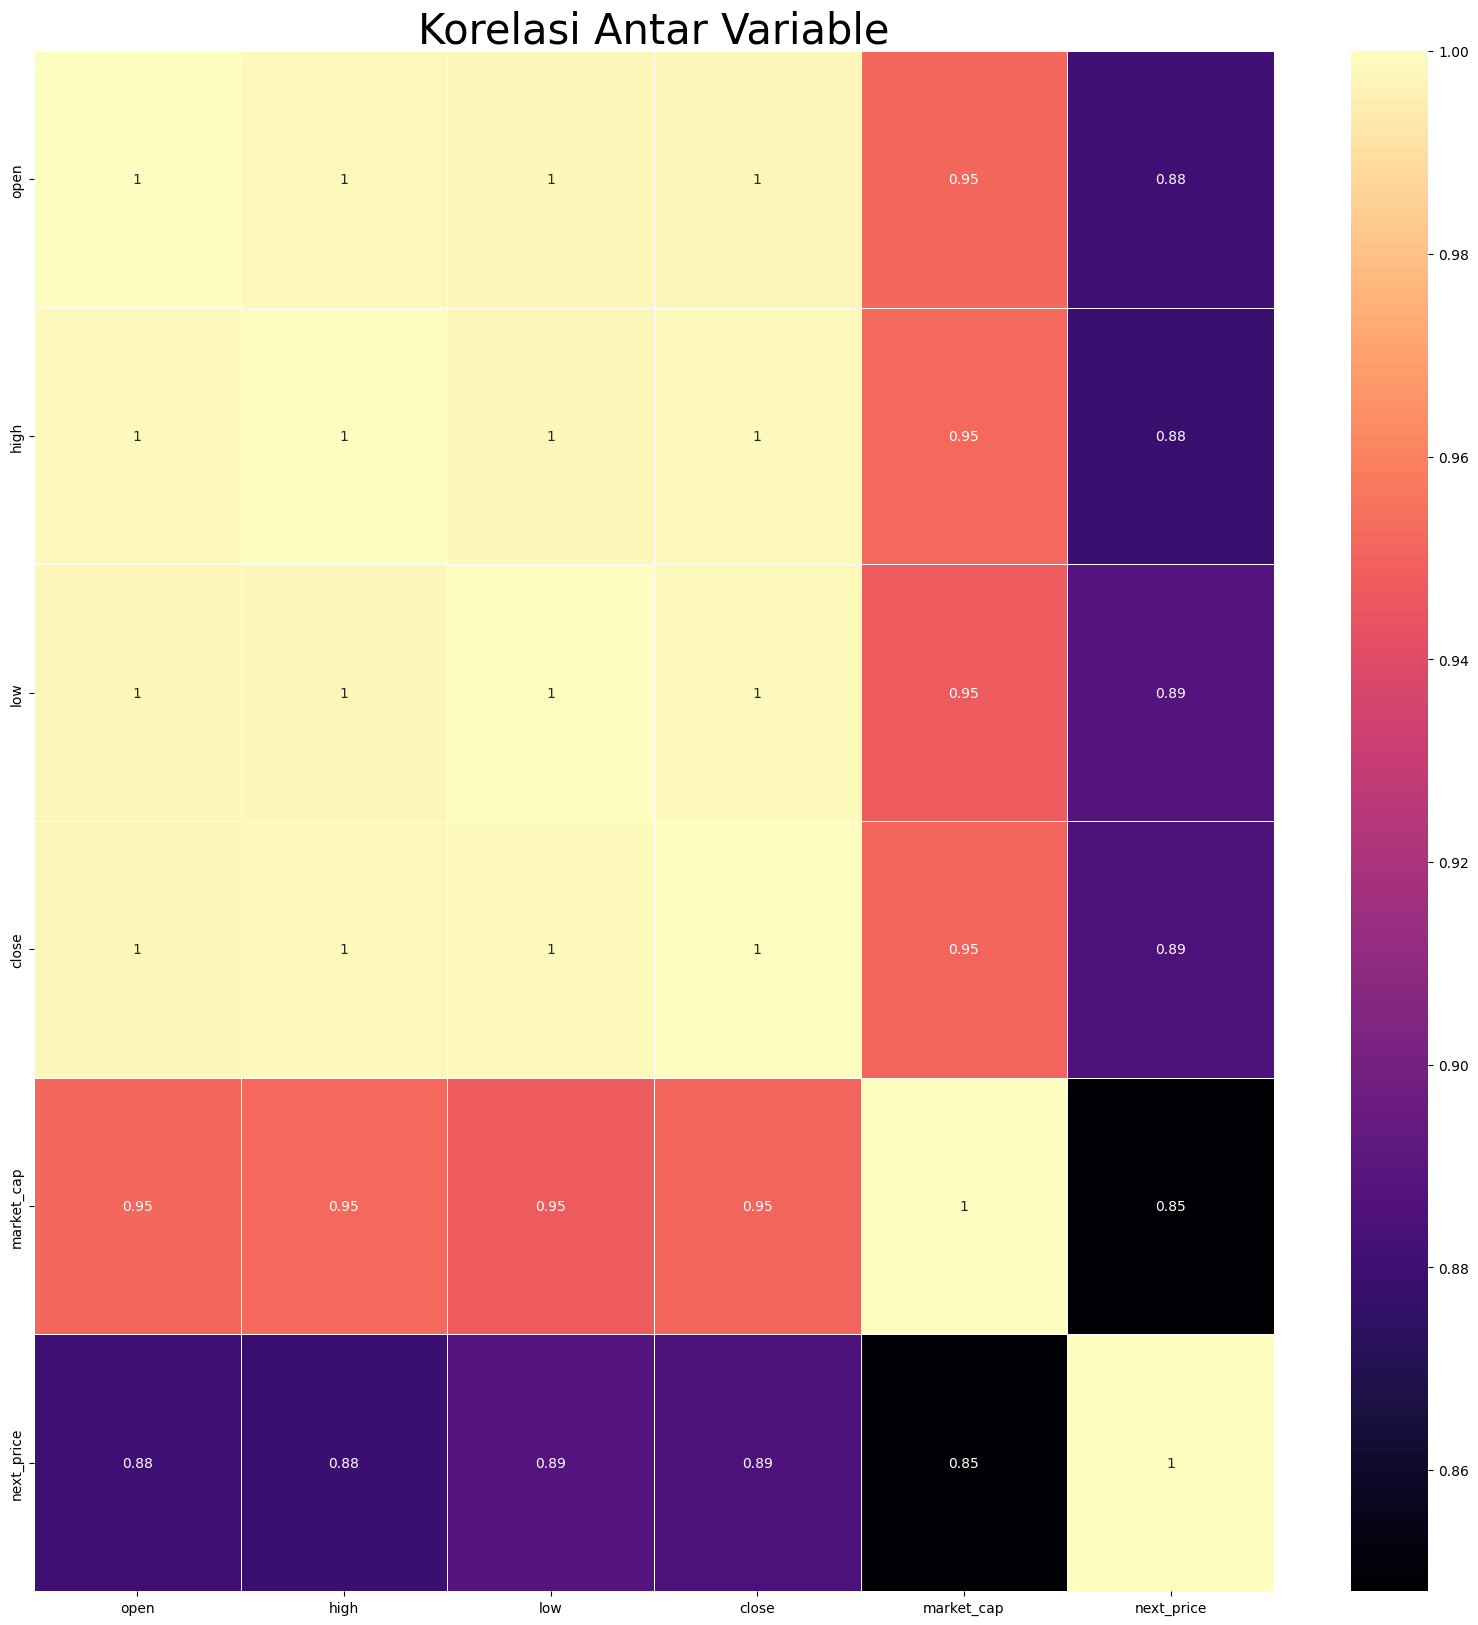

In [ ]:
# looking at the correlation between variables to find important features
plt.figure(figsize=(20,20))
cor = df.corr()
sns.heatmap(cor,annot=True, linewidth=.5, cmap="magma")
plt.title('Korelasi Antar Variable', fontsize = 30)
plt.show()

#Save File

In [23]:
df.to_csv('btcdata_clean.csv')
files.download('btcdata_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>